In [81]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import  seaborn as sns
import plotly.express as px
sns.set()
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.decomposition import PCA

In [67]:
data=pd.read_csv('data/healthcare-dataset-stroke-data.csv')
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


###  Explore Data
 Exploring the data give insight on the data 

In [76]:
print('----------Dataset Shape----------')
print('No of Rows: ', data.shape[0],'| No of Columns: ',data.shape[1])
print('----List of columns----')
print('Columns:', data.columns.tolist())
print('---------------------------------')

# print('----Column with unique values----')
# col=data.columns.tolist()
# for i in range(len(cols)):
#   print(cols[i],": ",data[cols[i]].unique().tolist())
# print('---------------------------------')


print('-----Column with  Nulls Dtype-----')
print(data.info())

print('---------------------------------')
print("No of Null values in column \'bmi':",data.bmi.isna().sum())

print("Percentage of missing values in bmi: ", round(100*data['bmi'].isna().sum()/data['bmi'].count(),2),"%")


----------Dataset Shape----------
No of Rows:  5109 | No of Columns:  11
----List of columns----
Columns: ['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status', 'stroke']
---------------------------------
-----Column with  Nulls Dtype-----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5109 entries, 0 to 5108
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5109 non-null   object 
 1   age                5109 non-null   float64
 2   hypertension       5109 non-null   int64  
 3   heart_disease      5109 non-null   int64  
 4   ever_married       5109 non-null   object 
 5   work_type          5109 non-null   object 
 6   Residence_type     5109 non-null   object 
 7   avg_glucose_level  5109 non-null   float64
 8   bmi                4908 non-null   float64
 9   smoking_status     5109 non-nul

#### Observations:

Column 'bmi' has 201 Null values. These need to be imputed later in the code 
Columns 'gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status' have Dtype Object/String. These need to be transformed into numerical values later in the code



In [68]:
# Drop column 'id'
data.drop('id', axis=1, inplace = True)

# Reset index of dataframe
data = data.reset_index(drop = True)

#### Check unique value counts in columns

In [69]:
# function to print unique value counts in columns of a dataframe
def unique_col_counts(data, columns):
  for i in range(len(columns)):
    print(data[columns[i]].value_counts(),"\n")

# Display unique value counts in columns
columns = ['gender','hypertension','heart_disease','ever_married','work_type','Residence_type','smoking_status','stroke']
unique_col_counts(data, columns)

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64 

0    4612
1     498
Name: hypertension, dtype: int64 

0    4834
1     276
Name: heart_disease, dtype: int64 

Yes    3353
No     1757
Name: ever_married, dtype: int64 

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64 

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64 

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64 

0    4861
1     249
Name: stroke, dtype: int64 



#### Observations:

 ##### 'gender' has 1 row as 'Other'. The rest are either 'Female' or 'Male'. This row can be dropped without any significant impact
 ##### 'work_type' has several categories. These will be generalized and numerical encoded later in code
 ##### 'smoking_status' has several categories. These will be generalized and numerical encoded later in code
 ##### 'ever_married' and 'Residence_type' have string values. These will be numerical binary encoded later in code


#### Drop 1 row with 'gender' value 'Other'

In [70]:
# Display row with 'gender' is 'Other'
display(data[data['gender'] == 'Other'])


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3116,Other,26.0,0,0,No,Private,Rural,143.33,22.4,formerly smoked,0


In [71]:
# Drop row
data.drop(data.index[data['gender'] == 'Other'], inplace=True)

# Reset index of dataframe
data = data.reset_index(drop = True)

### Data Preprocessing

Outlier Removal

    Find outliers in the contiguos numeric data columns 'age', 'bmi'
    
 An outlier is an observation that lies an abnormal distance from other values in a random sample from a population. 
 #### OR
 An outlier is a value or point that differs substantially from the rest of the data


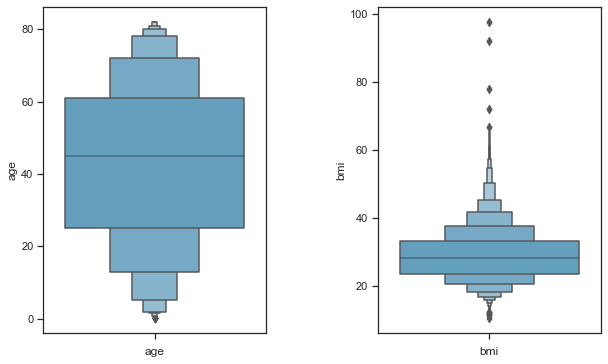

In [32]:
# Set seaborn style palette
sns.set_theme(style="ticks", palette="icefire")

# Array of columns that we would like to plot
cols = ['age','bmi']

# Instantiate figure and axes for as many subplots as the columns in question
fig, ax = plt.subplots(ncols=len(cols), figsize=(5 * len(cols),6), sharex = True)

# Draw a Boxen Plot for each column in question
for i in range(len(cols)):
  (sns.boxenplot(y=data[cols[i]],data=data, showfliers=True,ax=ax[i])).set(xlabel=cols[i])

# Adjust space between subplots
fig.subplots_adjust(wspace=0.5)

#### Observations:

    'age' has no outliers
    'bmi' has outlier values > 80. These can be deleted

#### Next:

    Drop rows with 'bmi' > 80



In [33]:
# Display rows with 'bmi' > 80
display(data[data['bmi'] > 80])


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
2128,Male,17.0,1,0,No,Private,Rural,61.67,97.6,Unknown,0
4208,Male,38.0,1,0,Yes,Private,Rural,56.90,92.0,never smoked,0


In [34]:
# Drop rows
data.drop(data.index[data['bmi'] > 80], inplace=True)

# Reset index of dataframe
data = data.reset_index(drop = True)

#### Data Transformation

    Replace values in 'work_type' and 'smoking_status' with generalized values



In [35]:
# Declare dictionary of old vs new values for 'work_type'
new_work_type ={'Private' : 'Work',
                 'Self-employed' : 'Work',
                 'children': 'No Work',
                 'Govt_job' : 'Work',
                 'Never_worked' : 'No Work'
                }
# Replace old values with new
data['work_type'].replace(new_work_type, inplace = True)

# Declare dictionary of old vs new values for 'smoking_status'
new_smoking_status ={'smokes' : 'Yes',
                      'never smoked' : 'No',
                      'Unknown' : 'No',
                      'formerly smoked': 'No'
                     }
# Replace old values with new
data['smoking_status'].replace(new_smoking_status, inplace = True)

# Check the newly assigned values and counts
columns = ['work_type','smoking_status']
unique_col_counts(data, columns)


Work       4398
No Work     709
Name: work_type, dtype: int64 

No     4318
Yes     789
Name: smoking_status, dtype: int64 



#### Encoding Categorical Features with One-Hot Encoder

    The categorical columns are nominal and will be encoded using one-hot encoder
    
##### Encode categorical features as a one-hot numeric array.

The input to this transformer should be an array-like of integers or strings, denoting the values taken on by categorical (discrete) features. The features are encoded using a one-hot (aka ‘one-of-K’ or ‘dummy’) encoding scheme. This creates a binary column for each category and returns a sparse matrix or dense array (depending on the sparse parameter)

This convert the category into 1 and 0  in an arrary format


In [37]:

# Categorical Columns: 'gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'

# Initialize One Hot Encoder
one_hot_encoder = OneHotEncoder()
# Fit and Transform the columns
df_temp = one_hot_encoder.fit_transform(data[['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']]).toarray()

# Get newly encoded columns and concat them to the Dataframe
encodings = pd.DataFrame(columns = one_hot_encoder.get_feature_names_out(),data = df_temp)
encodings = encodings.astype(int)
data = pd.concat([data,encodings] , axis=1)

# Drop original columns from the dataset after encoding is done
data.drop(['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'],axis = 1, inplace=True)
data.head()



,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,ever_married_No,ever_married_Yes,work_type_No Work,work_type_Work,Residence_type_Rural,Residence_type_Urban,smoking_status_No,smoking_status_Yes
0,67.0,0,1,228.69,36.6,1,0,1,0,1,0,1,0,1,1,0
1,61.0,0,0,202.21,NaN,1,1,0,0,1,0,1,1,0,1,0
2,80.0,0,1,105.92,32.5,1,0,1,0,1,0,1,1,0,1,0
3,49.0,0,0,171.23,34.4,1,1,0,0,1,0,1,0,1,0,1
4,79.0,1,0,174.12,24.0,1,1,0,0,1,0,1,1,0,1,0


#### Missing values Imputation

    As observed earlier, 'bmi' has Null values

Next: We will use mode of 'bmi' and assign to missing values

In [42]:
# Calculate mode of 'bmi' and assign to missing values in 'bmi'
bmi_mode = data['bmi'].mode()
data = data.fillna({'bmi' : bmi_mode[0]})

# Check to see there are no more missing values
data.isna().sum()

age                     0
hypertension            0
heart_disease           0
avg_glucose_level       0
bmi                     0
stroke                  0
gender_Female           0
gender_Male             0
ever_married_No         0
ever_married_Yes        0
work_type_No Work       0
work_type_Work          0
Residence_type_Rural    0
Residence_type_Urban    0
smoking_status_No       0
smoking_status_Yes      0
dtype: int64

#### Feature Scaling

Next: Divide dataset into X feature variables and target variable y



In [43]:
# Create X and y variables
X = data.drop(['stroke'],axis=1)  
y = data['stroke'].to_frame()

In [77]:
y

,stroke
0,1
1,1
2,1
3,1
4,1
...,...
5102,0
5103,0
5104,0
5105,0


In [78]:
# Instantiate Stander Scaler and fit and tranform feature variable set X
scaler = StandardScaler()
df = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
df.head(2)

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,ever_married_No,work_type_No Work,Residence_type_Rural,smoking_status_No
0,1.050908,-0.327977,4.183733,2.706084,1.019950,-1.190354,-0.72358,-0.401509,-0.983492,0.427462
1,0.785570,-0.327977,-0.239021,2.121277,-0.021231,0.840086,-0.72358,-0.401509,1.016785,0.427462


### Dimensionality Reduction with PCA

<AxesSubplot:>

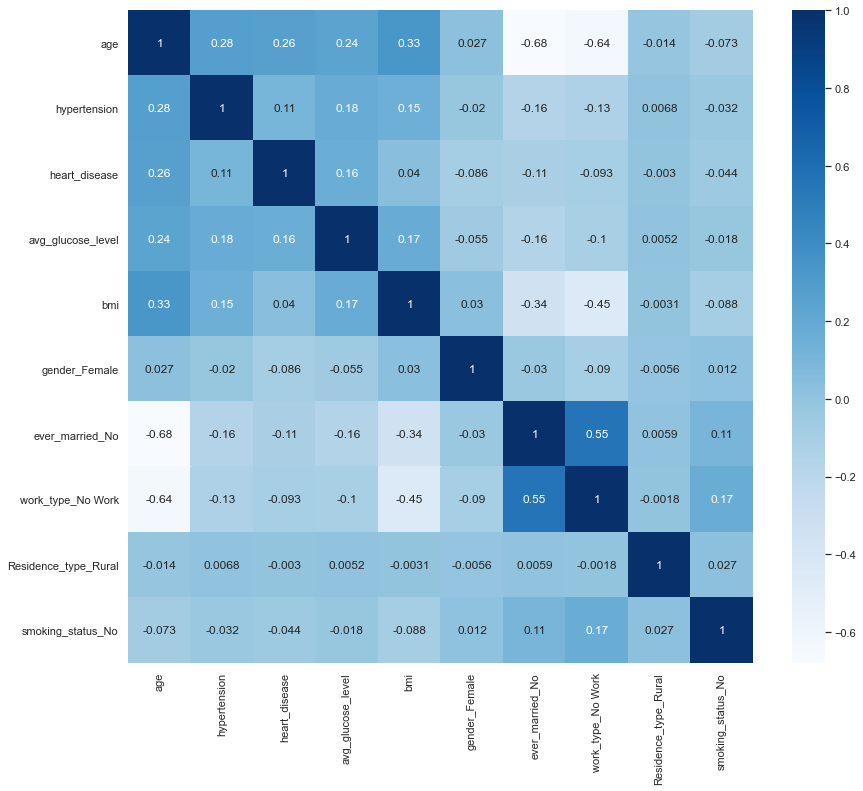

In [79]:
#  Plot Seaborn Heatmap to identify correlated features
fig = plt.figure(figsize=(14,12))         
sns.heatmap(X.corr(), annot = True, cmap = "Blues")



#### Observations:

    There are several correlated features as we performed encoding on categorical features.

Next:

    Reduce dimensions of dataset using PCA algorithm



In [82]:
# PCA with 95% variance retained
pca = PCA(n_components = 0.95)
pca.fit(df)
df = pd.DataFrame(pca.transform(df))
df.head(3)

,0,1,2,3,4,5,6,7,8
0,-2.612200,3.616719,0.946084,-0.750976,-1.459967,1.154278,-2.062768,1.055601,-0.175414
1,-1.238594,0.239310,-1.455674,-0.086769,0.402272,0.274614,-1.586580,-1.189435,0.016565
2,-2.123245,2.530917,-0.112363,1.082492,-2.496229,1.845802,-0.058333,1.382721,-0.239196


#### Observations:

    Number of dimensions have reduced from 15 to 8



### Model Training and Prediction

In [90]:
# Import libraries for Model training, prediction and evaluation
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import xgboost as xgb
import pickle

In [86]:
# Split Data into Train and Test sets with 80% of data as Train set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

#### Create a model function 
Train model using Training set and Predict on the Test set



In [92]:
# Function to fit classifier and print Accuracy score
def model(classifier,model_name, X_train = X_train, y_train = y_train,
                             X_test = X_test, y_test = y_test):
# Fit Model to the training set
    classifier.fit(X_train,np.ravel(y_train))

 # save the model to disk using pickle
    filename = model_name+'.sav'
    pickle.dump(classifier, open(filename, 'wb'))

# Predict testing set using the Trained Model
    y_pred = classifier.predict(X_test)
    print("Model: ",type(classifier).__name__)
    print("Test Data Accuracy: %0.2f" % accuracy_score(y_test,y_pred))

### Decision Trees Training and Prediction

In [93]:
# Initialize Logistic Regression with max_iteration 1000
clf_dct = DecisionTreeClassifier()

# Fit Model to the training set
model(clf_dct,'decision_tree')



Model:  DecisionTreeClassifier
Test Data Accuracy: 0.91


### SVC Training and Prediction

In [94]:
clf_svc = SVC()
model(clf_svc,'svc')

Model:  SVC
Test Data Accuracy: 0.95


### Load save model 

Pickle is the standard way of serializing objects in Python.

You can use the pickle operation to serialize your machine learning algorithms and save the serialized format to a file.



In [97]:
# load the model from disk
loaded_model = pickle.load(open("decision_tree.sav", 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.910958904109589
